In [3]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

#operation across the entire array like this, all of the pixels in our gray image scale are with values between 0 and 255, dividing by 255 thus ensures that every pixel is represented by a number between 0 and 1 instead -> normalizing the images
training_images = training_images / 255.0
test_images = test_images / 255.0

#first flatten is the layer specification
# input 28 x 28 images -. series of values
# flatten takes the square value (2D array) and turns it into a line (a 1D array)
#dense is the layer of neuron - 128 - middle, hidden layer, no fixed rule for the neurons to use
# more neurons more slowly
# more neurons leads to recognizing training data greatly, but not the data it has not already seen -> overfitting 
#hyperparametr tuning - value, that is used to control the training - opposed to the internal values of the neurons that get trained (parameters)
#activation function - code that will execute on each neuron, function that returns a value if its greater than 0, we dont want negative values to being passed to the next layer -> activate the layer with relu
#10 neurons because of 10 classes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

#specify the loss function and the optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5


2023-10-09 16:45:20.217148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-09 16:45:20.293528: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.5466 - accuracy: 0.8102
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4696 - accuracy: 0.8370
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4667 - accuracy: 0.8399
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4652 - accuracy: 0.8408
Epoch 5/5
  9/313 [..............................] - ETA: 2s - loss: 0.4447 - accuracy: 0.8368  

2023-10-09 16:46:31.789859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.5225 - accuracy: 0.8208


[0.5225253701210022, 0.8208000659942627]

Classification gives us back an array of values. These are the val‐ ues of the 10 output neurons. The label is the actual label for the item of clothing, in this case 9. There’s a 91.4% chance that the item of clothing at index 0 is label 9. We know that it’s label 9

In [5]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step
[2.1100830e-08 6.9072963e-11 6.5779091e-07 1.2020794e-08 5.7153418e-08
 6.7010261e-02 1.1357068e-06 2.1120697e-02 1.5411586e-04 9.1171306e-01]
9


Overfitting -> 50 epochs instead of 5 - accuracy will be bigger, but the test set will be 88 %. It has become overspecialized to the training data, a process often called overfitting. The network is doing much better with the training data, but it’s not necessarily a better model.

Callbacks - we might want to train until we reach the desired accuracy instead of constantly trying different numbers of epochs and training and retraining until we get to our desired value

In [11]:
import tensorflow as tf

#class called myCallback, that takes a tf.keras.callbacks.callback as a parameter
#in it we define on_epoch_end function, which will give us details about the logs for this epoch. In these logs is an accuracy value, so all we have to do is see if it is greater than .95 (or 95%); if it is, we can stop training by saying self.model.stop_training = True
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

#to train for 50 epochs, and then added a callbacks parameter. To this, I pass the callbacks object. When training, at the end of every epoch, the callback function will be called.
model.fit(training_images, training_labels, epochs = 50, callbacks = [callbacks])

Epoch 1/50


2023-10-09 17:07:28.283036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-09 17:07:28.342176: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.5477 - accuracy: 0.8100
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4715 - accuracy: 0.8377
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4685 - accuracy: 0.8390
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4708 - accuracy: 0.8395
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4759 - accuracy: 0.8382
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4741 - accuracy: 0.8411
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4821 - accuracy: 0.8397
Epoch 8/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4931 - accuracy: 0.8373
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4945 - accuracy: 0.8373
Epoch 10/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5060

In [12]:
import pandas
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pandas.read_csv("Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
#csMPa pevnost je závislá vysvětlovaná proměnná, vlnovka rovná se, potom názvy sloupečků - nezávislé vysvětlující
formula = "csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age"
mod = smf.ols(formula, data)
res = mod.fit()
print(res.summary())

#výsledky - jakým způsobem se mi projevují koeficienty - záporný má voda - čím víc dám vody, tím je tvrdost menší
#superplastikátor - výrazně zvyšuje tvrdost
#kamenivo - přispívají mnohem méně k tvrdosti - malý koeficient
#voda ovlivňuje negativně

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          6.29e-206
Time:                        18:37:49   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586  

In [15]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

data = pandas.read_csv("nba_logreg.csv")
data = data.drop(columns="Name")
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Rozdělení dat na trénovací a testovací 
sloupec x - všechny data kromě posledního sloupečku
y - sloupeček, který se snažíme predikovat

In [16]:
X = data.drop(columns=["TARGET_5Yrs"])
y = data["TARGET_5Yrs"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Scaler - převedení do stejných jednotek - nějaké věci jsou v procentech, nějaké v desetinných číslech

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Algoritmus - kneigborsclassifier a vytvoříme matici záměn
- necháme výchozí počet tříd - 5
- spočítáme predikce - poté využijeme pro predikci
- matrix - matice záměn


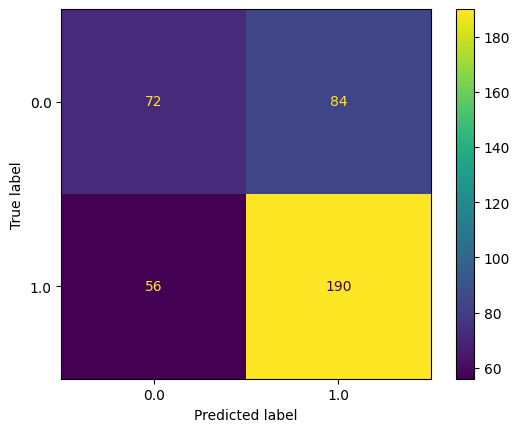

In [18]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=clf.classes_,
)

Podívám se na specifikace - což je 72 - což jsou true a negative - nezůstanou
190 - positive, hráči, kteří zůstali

Dál si uděláme výpočty - precision
TP / (TP + FP)
True positive = 190 / (190 + 84) (False positive)
Výsledek - 0.69

In [19]:
190 / (190 + 84)

precision_score(y_test, y_pred)

0.6934306569343066

Recall 
TP / TP + FN
190 / 190 + 56
Výsledek = 0.72

In [20]:
190 / (190 + 56)

recall_score(y_test, y_pred)

0.7723577235772358

Recall - dobrý hráč, co je označen za špatného
Provedeme pomocí cyklu
recall_score -> zobrazit graf
Recall roste - zlepšuje se, optimum je při 19 - maximální recall

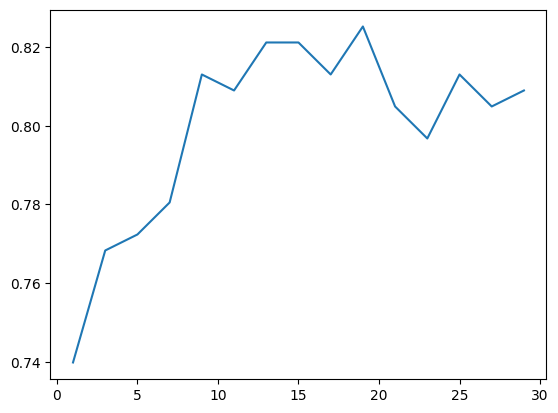

In [21]:
from sklearn.metrics import accuracy_score

ks = range(1, 31, 2)
recall_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall_scores.append(recall_score(y_test, y_pred))
plt.plot(ks, recall_scores)

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

data = pandas.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Rozděl data na vstupní a výstupní proměnné.
Využij GridSearchCV k nalezení nejlepšího parametru pro KNeighborsClassifier (počet sousedů) a SVC (strategie)

Který z parametrů byl nejlepší - počet sousedů, který si vedl v průměru nejlíp pro všechna možná rozdělení dat

In [6]:
X = data.drop(columns=["species"])
y = data["species"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
model_1 = KNeighborsClassifier()
params_1 = {"n_neighbors": range(1, 31, 2)}
clf_1 = GridSearchCV(model_1, params_1, scoring="accuracy")
clf_1.fit(X, y)
print(clf_1.best_params_)
print(clf_1.best_score_)

{'n_neighbors': 5}
0.96


Dále vyzkoušej, jestli by nebylo zajímavé převést data do více dimenzí. Porovnej výsledek lineárního kernelu (kernel="linear") s kernelem (kernel="rbf"). Můžeš vyzkoušet obě strategie, tj. budeš mít ve slovníku params dva klíče a každý z klíčů bude mít seznam dvou možných hodnot. Jaká dvojice parametrů má nejlepší hodnotu metriky accuracy?

porovnáme výsledky algoritmu K Nearest Neighbors se Support Vector Machine

In [4]:
model_2 = SVC()
params_2 = {"decision_function_shape": ["ovo", "ovr"], "kernel": ["linear", "rbf"]}
clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X, y)
print(clf_2.best_params_)
print(clf_2.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'linear'}
0.9666666666666668
